### **1. Importing Required Libraries**

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

### **2. Loading and Preprocessing Data**
We will be loading dataset from provided URL. After that we will preprocess it so that model can use this cleaned dataset for training and making prediction.

type : is added to distinguish between red and white wine: 1 for red wine and 0 for white wine.
pd.concat(): using this two datasets (red and white) are concatenated into a single data frame wine.
dropna(): Any rows with missing values are dropped using this to ensure clean data for training the model.

In [ ]:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

In [ ]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,1.0
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.0
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.0


In [ ]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.0
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.0
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.0
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.0
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,0.0
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,0.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,0.0


In [ ]:
red["type"]=1
white["type"]=0
wine=pd.concat([red,white])

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
wine.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## Alcohol contain in wine

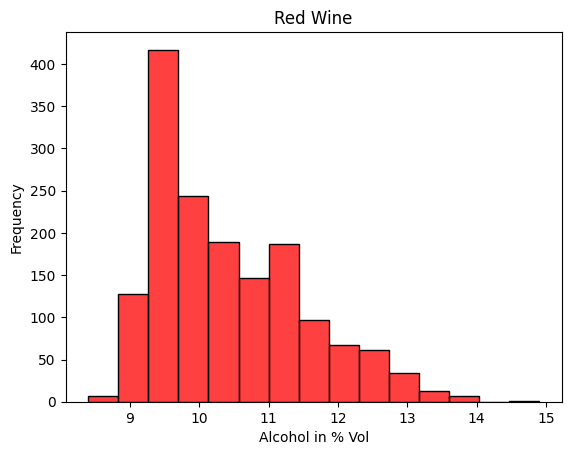

In [ ]:
sns.histplot(red["alcohol"],bins=15,color="red")
plt.xlabel("Alcohol in % Vol")
plt.ylabel("Frequency")
plt.title("Red Wine")
plt.show()


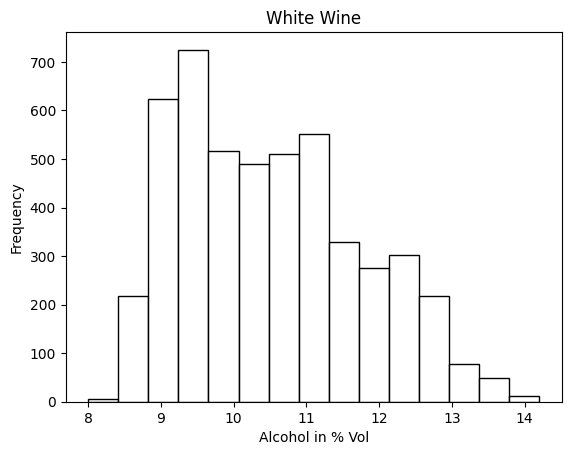

In [ ]:
sns.histplot(white["alcohol"],bins=15,color="white")
plt.xlabel("Alcohol in % Vol")
plt.ylabel("Frequency")
plt.title("White Wine")
plt.show()

**### 4. Splitting Data into Training and Testing Sets**
We will split our dataset into training and testing.

X contains all columns except the target variable (type), which is represented by y.
train_test_split(): splits the dataset into training (66%) and testing (34%) sets.
random_state=45: ensures that the split is reproducible.

In [ ]:
x = wine.drop("type", axis=1)
y = wine["type"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### **5. Creating Neural Network Model**
The function Sequential() defines a neural network with 3 layers:

Input layer: Dense(12) with 12 neurons and ReLU activation function where input_dim=12 matches the number of features (columns) in the input data.

Hidden layer: Dense(9) with 9 neurons and ReLU activation.

Output layer: Dense(1) with a single neuron and a sigmoid activation function since this is a binary classification problem (predicting red or white wine).

The model is compiled using the binary crossentropy loss function and the Adam optimizer.

In [ ]:
model=Sequential()
model.add(Dense(12,activation="relu",input_dim=12))
model.add(Dense(9,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           117 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283 (1.11 KB)

 Trainable params: 283 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

## **6. Training the Model**
We train the model using the training data (X_train, y_train) for 3 epochs with a batch size of 1.

In [ ]:
model.fit(x_train,y_train,epochs=3,batch_size=1)

Epoch 1/3
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8863 - loss: 0.4513
Epoch 2/3
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9402 - loss: 0.1645
Epoch 3/3
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9560 - loss: 0.1333


## **7. Making Predictions**
We make predictions using the trained model on the test data (X_test) and get the predicted probabilities for each wine sample. We then convert these probabilities into binary labels (1 for Red wine, 0 for White wine) and display the wine type prediction for the first 12 samples.

In [ ]:
y_pred=model.predict(x_test)
y_pred_labels = (y_pred >= 0.5).astype(int)

for prediction in y_pred_labels[:12]:
    wine_type = "Red wine" if prediction == 1 else "White wine"
    print(f"Prediction: {wine_type}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: Red wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9395 - loss: 0.1892
Accuracy: 0.9507692456245422
